In [46]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(10, 3))
import math
from IPython.display import Audio
from IPython.display import display, Markdown

In [47]:
sourceFilesPrefix="SamplesFromPaper//s"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data = scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
rate3, sample3_data = scipy.io.wavfile.read(sourceFilesPrefix+"3.wav")
rate4, sample4_data = scipy.io.wavfile.read(sourceFilesPrefix+"4.wav")
rate5, sample5_data = scipy.io.wavfile.read(sourceFilesPrefix+"5.wav")

In [48]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

# First input signal \( vacuum cleaner \)

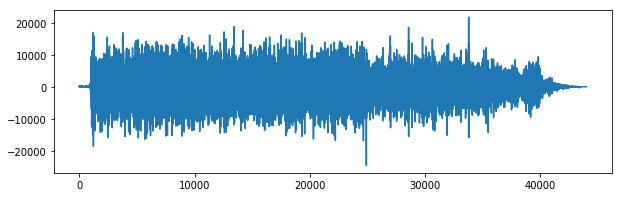

In [49]:
display(Markdown("# First input signal \( vacuum cleaner \)"))
plt.figure(1)
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

# Second input signal \( clapping \)

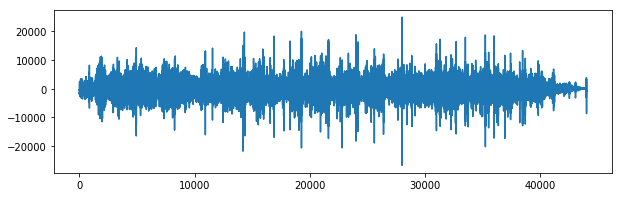

In [50]:
display(Markdown("# Second input signal \( clapping \)"))
plt.figure(1)
plt.plot(sample3_data)
plt.show()
Audio(data=sample3_data, rate=16000)

# Third input signal \( laughter \)

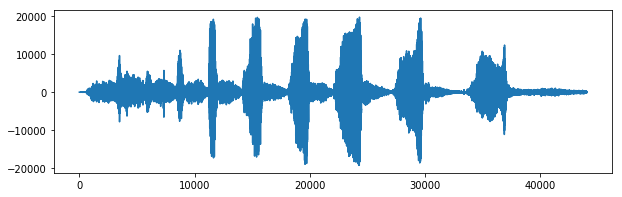

In [51]:
display(Markdown("# Third input signal \( laughter \)"))
plt.figure(1)
plt.plot(sample4_data)
plt.show()
Audio(data=sample4_data, rate=16000)

In [52]:
# Whiten the data
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
med3=sample3_data.std(axis=0)
s3data=sample3_data/med3
med4=sample4_data.std(axis=0)
s4data=sample4_data/med4

orig=np.matrix([s2data,s3data,s4data])
n=len(orig)
A=np.random.random([n,n])
A=np.matrix([[0.77191,0.47520,0.58699],
             [0.33712,0.47563,0.20836],
             [0.96878,0.57618,0.65625]])
print("Mixing matrix: \n"+str(A))
X=np.dot(A,orig)
print("Correlation matrix: \n"+str(np.corrcoef(X)))

Mixing matrix: 
[[ 0.77191  0.4752   0.58699]
 [ 0.33712  0.47563  0.20836]
 [ 0.96878  0.57618  0.65625]]
Correlation matrix: 
[[ 1.          0.90849405  0.99879514]
 [ 0.90849405  1.          0.91174739]
 [ 0.99879514  0.91174739  1.        ]]


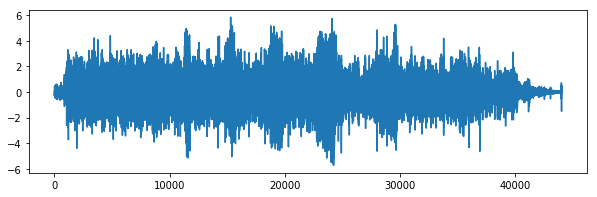

In [53]:
plt.figure(1)
plt.plot(X[0].T)
plt.show()
Audio(data=X[0], rate=16000)

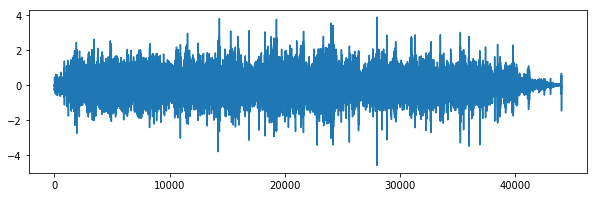

In [54]:
plt.figure(2)
plt.plot(X[1].T)
plt.show()
Audio(data=X[1], rate=16000)

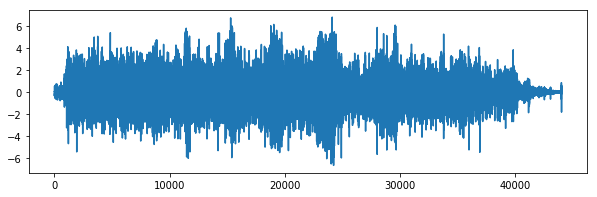

In [55]:
plt.figure(3)
plt.plot(X[2].T)
plt.show()
Audio(data=X[2], rate=16000)

In [56]:
corr12=1
corr13=1
corr23=1
while (abs(corr12)>=3e-6 or abs(corr13)>=3e-6) or abs(corr23)>=3e-6:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000

    W=np.random.uniform(0.001,0.01,(n,n))
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        W+=delW
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)
    print('Correlation coefficient: \n',corr)
    corr12=corr[1][0]
    corr13=corr[2][0]
    corr23=corr[2][1]

Initial guessed decomposition matrix: 
[[ 0.00147554  0.0046786   0.00263773]
 [ 0.0083738   0.00890322  0.00806649]
 [ 0.00924536  0.00868611  0.00594973]]
Correlation coefficient: 
 [[  1.00000000e+00  -1.68970332e-06  -6.55012165e-06]
 [ -1.68970332e-06   1.00000000e+00  -1.20578828e-06]
 [ -6.55012165e-06  -1.20578828e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00579835  0.00673194  0.002153  ]
 [ 0.00352985  0.00736762  0.00947121]
 [ 0.00629671  0.00749478  0.00977278]]
Correlation coefficient: 
 [[  1.00000000e+00  -6.21050831e-07   2.94200990e-06]
 [ -6.21050831e-07   1.00000000e+00  -6.74375805e-06]
 [  2.94200990e-06  -6.74375805e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00417175  0.00759771  0.00485479]
 [ 0.0031121   0.00889544  0.00286492]
 [ 0.00270275  0.00318203  0.00897678]]
Correlation coefficient: 
 [[  1.00000000e+00  -6.06445069e-06   3.01849097e-06]
 [ -6.06445069e-06   1.00000000e+00  -2.40269866e-06]
 [  3.01849097

In [57]:
print("Final decomposition matrix: \n",W)
Y2=np.dot(W,X)

Final decomposition matrix: 
 [[ 0.09322169 -0.01036025 -0.07000592]
 [ 0.01557195  0.02181615 -0.01931262]
 [-0.08645991 -0.01147578  0.07977679]]


# First recoverd signal

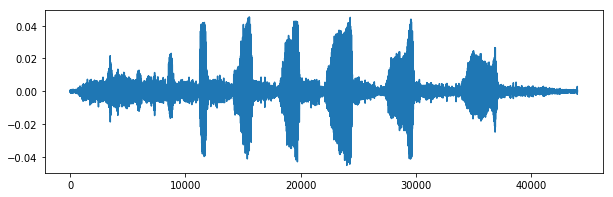

In [58]:
display(Markdown("# First recoverd signal"))
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
Audio(data=Y2[0], rate=16000)

# Second recoverd signal

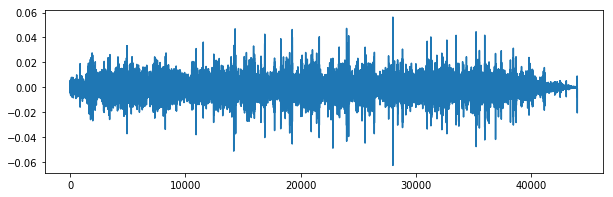

In [59]:
display(Markdown("# Second recoverd signal"))
plt.figure(1)
plt.plot(Y2[1].T)
plt.show()
Audio(data=Y2[1], rate=16000)

# Third recoverd signal

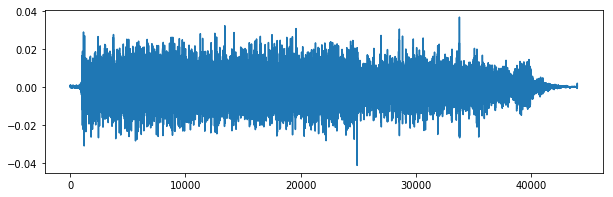

In [60]:
display(Markdown("# Third recoverd signal"))
plt.figure(1)
plt.plot(Y2[2].T)
plt.show()
Audio(data=Y2[2], rate=16000)